In [52]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

*Code Writer: Chaeeun Ryu*

# Linear Discriminant Analysis (LDA)

In [2]:
X1 = [5,4,7,8,3,2,6,9,5]
X2 = [7,3,8,6,6,5,6,6,4]
Class = [1,2,2,2,1,1,1,2,2]

In [5]:
df = pd.DataFrame({'X1':X1,'X2':X2,'Class':Class})
df

,X1,X2,Class
0,5,7,1
1,4,3,2
2,7,8,2
3,8,6,2
4,3,6,1
5,2,5,1
6,6,6,1
7,9,6,2
8,5,4,2


In [19]:
mu_1 = np.array([df[df['Class']==1]['X1'].mean(),df[df['Class']==1]['X2'].mean()])
mu_2 = np.array([df[df['Class']==2]['X1'].mean(),df[df['Class']==2]['X2'].mean()])
print("mu_1:",mu_1)
print("mu_2:",mu_2)

n1,n2 = Class.count(1),Class.count(2)
print(f"n1:{n1}   n2:{n2}")

mu_1: [4. 6.]
mu_2: [6.6 5.4]
n1:4   n2:5


In [24]:
(df[df['Class']==1].drop('Class',axis = 1)-mu_1)

,X1,X2
0,1.0,1.0
4,-1.0,0.0
5,-2.0,-1.0
6,2.0,0.0


In [33]:
len((df[df['Class']==1].drop('Class',axis = 1)).columns)

2

In [26]:
(df[df['Class']==1].drop('Class',axis = 1)-mu_1).to_numpy()

array([[ 1.,  1.],
       [-1.,  0.],
       [-2., -1.],
       [ 2.,  0.]])

variance-covariance matrix for class 1 $S1$

In [34]:
p = len((df[df['Class']==1].drop('Class',axis = 1)).columns)
mat = np.zeros((p,p))
for vector in (df[df['Class']==1].drop('Class',axis = 1)-mu_1).to_numpy():
  vector = np.array(vector)
  vector = vector.reshape(-1,1)
  # print(vector.shape)
  # print(vector.T.shape)
  mat += vector*vector.T

In [36]:
S1 = (1/(n1-1))*(mat)
S1#variance-covariance

array([[3.33333333, 1.        ],
       [1.        , 0.66666667]])

variance-covariance matrix for class 2 $S2$

In [39]:
p = len((df[df['Class']==2].drop('Class',axis = 1)).columns)
mat = np.zeros((p,p))
for vector in (df[df['Class']==2].drop('Class',axis = 1)-mu_2).to_numpy():
  vector = np.array(vector)
  vector = vector.reshape(-1,1)
  # print(vector.shape)
  # print(vector.T.shape)
  mat += vector*vector.T

In [40]:
S2 = (1/(n2-1))*(mat)
S2#variance-covariance

array([[4.3 , 2.95],
       [2.95, 3.8 ]])

Pooled variance-covariance matrix $Sp$

In [41]:
Sp = ((n1-1)*S1+(n2-1)*S2)/(n1+n2-2)
Sp

array([[3.88571429, 2.11428571],
       [2.11428571, 2.45714286]])

$w = S_p^{-1}(\bar{x}^{(1)}-\bar{x}^{(2)})$

In [47]:
w = np.matmul(np.linalg.inv(Sp),(mu_1-mu_2))
w

array([-1.50803859,  1.54180064])

decision boundary

$(\mu_1-\mu_2)^T\Sigma^{-1}x \geq \frac{1}{2}(\mu_1-\mu_2)^T\Sigma^{-1}\mu_1 + \frac{1}{2}(\mu_1-\mu_2)^T\Sigma^{-1}\mu_2$

$$≡$$

$w^Tx \geq \frac{1}{2}w^T\mu_1 + \frac{1}{2}w^T\mu_2$

In [51]:
print("decision boundary")
print(f"{w[0]}x1 + {w[1]}x2 >= {.5*np.dot(w.T,mu_1)+.5*np.dot(w.T,mu_2)}")

decision boundary
-1.5080385852090035x1 + 1.541800643086817x2 >= 0.7956591639871391


In [63]:
df[df['Class'] == 1]

,X1,X2,Class
0,5,7,1
4,3,6,1
5,2,5,1
6,6,6,1


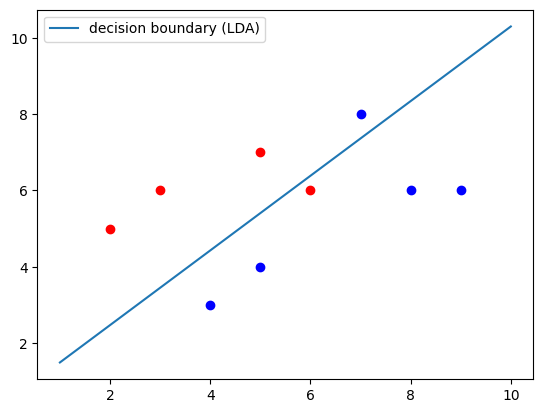

In [94]:
plt.scatter(df[df['Class'] == 1]['X1'],df[df['Class'] == 1]['X2'],color = 'red')
plt.scatter(df[df['Class'] == 2]['X1'],df[df['Class'] == 2]['X2'],color = 'blue')
x_range = np.arange(1,10,0.001)
y_ = [(-1*x*w[0]+.5*np.dot(w.T,mu_1)+.5*np.dot(w.T,mu_2))/w[1] for x in x_range]
plt.plot(x_range,y_,label= "decision boundary (LDA)")
plt.legend()
plt.show()

In [89]:
lda_pred=[]
intercept = .5*np.dot(w.T,mu_1)+.5*np.dot(w.T,mu_2)
for x in df.drop('Class',axis = 1).to_numpy():
  if w[0]*x[0]+w[1]*x[1]>=intercept:
    lda_pred.append(1)
  else:
    lda_pred.append(2)

In [90]:
df['LDA_pred'] = lda_pred

# Quadratic Discriminant Analysis (QDA)

$U_1 = -\frac{1}{2}(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1)-\frac{1}{2}ln|\Sigma_1|$

$U_2 = -\frac{1}{2}(x-\mu_2)^T\Sigma_2^{-1}(x-\mu_2)-\frac{1}{2}ln|\Sigma_2|$

In [84]:
def U1(x):
  x = np.array(x)
  x = x.reshape(-1,1)
  mu_1_ = mu_1.reshape(-1,1)
  cal1 = -0.5*np.array(x-mu_1_).T
  # print("cal1:",cal1.shape)
  cal2 = np.matmul(cal1,np.linalg.inv(S1))
  cal3 = np.matmul(cal2,np.array(x-mu_1_))
  return cal3-0.5*np.log(np.linalg.det(S1))

In [85]:
def U2(x):
  x = np.array(x)
  x = x.reshape(-1,1)
  mu_2_ = mu_2.reshape(-1,1)
  cal1 = -0.5*np.array(x-mu_2_).T
  cal2 = np.matmul(cal1,np.linalg.inv(S2))
  cal3 = np.matmul(cal2,np.array(x-mu_2_))
  return cal3-0.5*np.log(np.linalg.det(S2))

In [86]:
pred=[]
for x in df.drop('Class',axis = 1).to_numpy():
  x = list(x)
  if U1(x)>U2(x):
    pred.append(1)
  else:
    pred.append(2)

In [87]:
df['QDA_pred'] = pred

In [91]:
df

,X1,X2,Class,QDA_pred,LDA_pred
0,5,7,1,1,1
1,4,3,2,2,2
2,7,8,2,2,1
3,8,6,2,2,2
4,3,6,1,1,1
5,2,5,1,1,1
6,6,6,1,1,2
7,9,6,2,2,2
8,5,4,2,2,2
